In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


https://www.kaggle.com/tasneemabdulrahim/tips-dataset

In [3]:
# 빈도표
import pandas as pd
import numpy as np

party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [8]:
pd.pivot_table(tips,index='day',
               columns='size',
               values='total_bill',
               aggfunc='count',fill_value = 0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [9]:
pc_25 = party_counts.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [11]:
pc_25.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [15]:
# pc_25 각 열방향 합계 1로 정규화
# pc_25.apply(lambda x : x/pc_25.sum(1))
pc_25.div(pc_25.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

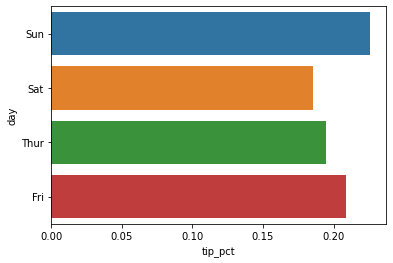

In [18]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h',ci=None)

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

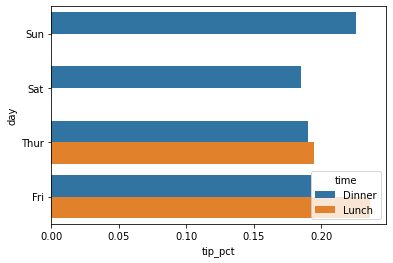

In [21]:
sns.barplot(x='tip_pct',y='day', hue= 'time', data=tips, orient='h',ci=None)

<AxesSubplot:xlabel='size', ylabel='count'>

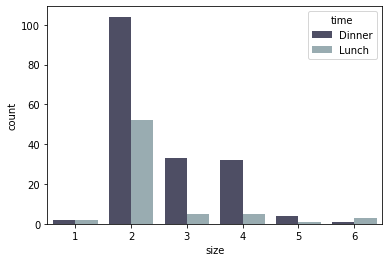

In [24]:
# countplot()
import warnings
warnings.filterwarnings('ignore')
sns.countplot('size', data=tips, hue='time', palette='bone')

In [26]:
# np.random.normal(loc, scale, size) : 정규분포 난수 샘플
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       5.024846
std        5.312577
min       -2.776171
25%       -0.084878
50%        3.572154
75%       10.137281
max       15.628496
dtype: float64

<AxesSubplot:ylabel='Count'>

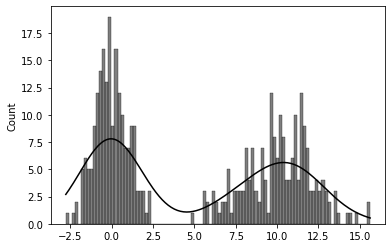

In [32]:
sns.histplot(values,bins=100,color='k',kde=True)
# sns.displot(values,bins=100,color='k',kde=True)

In [34]:
fish_multi = pd.read_csv('dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Count'>

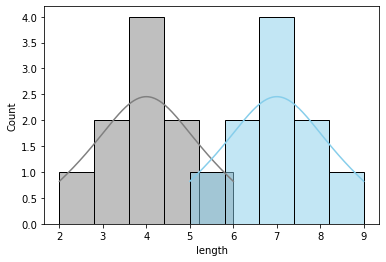

In [38]:
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.histplot(length_a, bins=5, color='gray', kde=True)
sns.histplot(length_b, bins=5, color='skyblue', kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

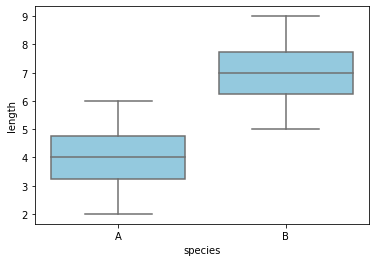

In [41]:
# box plot
sns.boxplot(x='species',y='length',data=fish_multi,color='skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

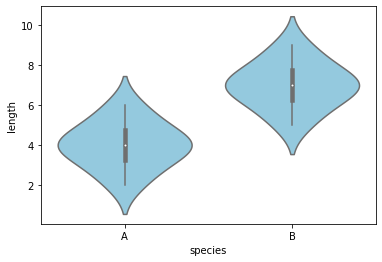

In [42]:
# 바이올린 플롯
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
sns.violinplot(x='species',y='length',data=fish_multi,color='skyblue')

In [43]:
cov_data = pd.read_csv('dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


<Figure size 216x144 with 0 Axes>

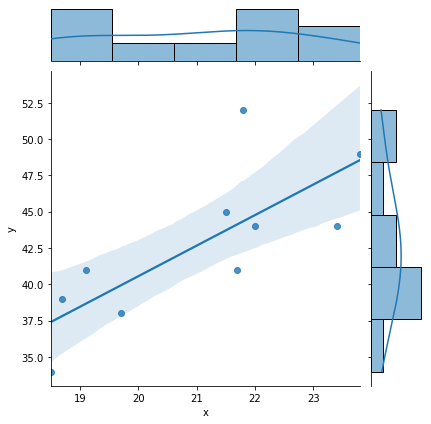

In [45]:
sns.jointplot(cov_data.x,cov_data.y,kind='reg')

In [2]:
import pandas as pd
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


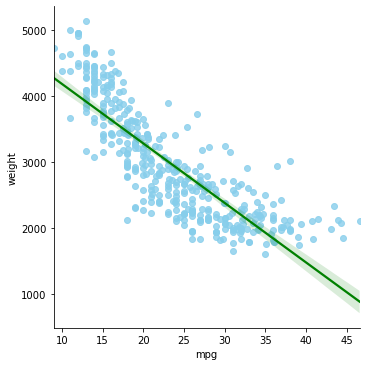

In [50]:
sns.lmplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'},
          line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

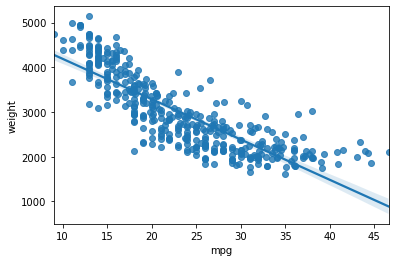

In [52]:
# sns.regplot(x='mpg',y='weight',data=df_auto, fit_reg=False)
sns.regplot(x='mpg',y='weight',data=df_auto) # default : fig_reg=True

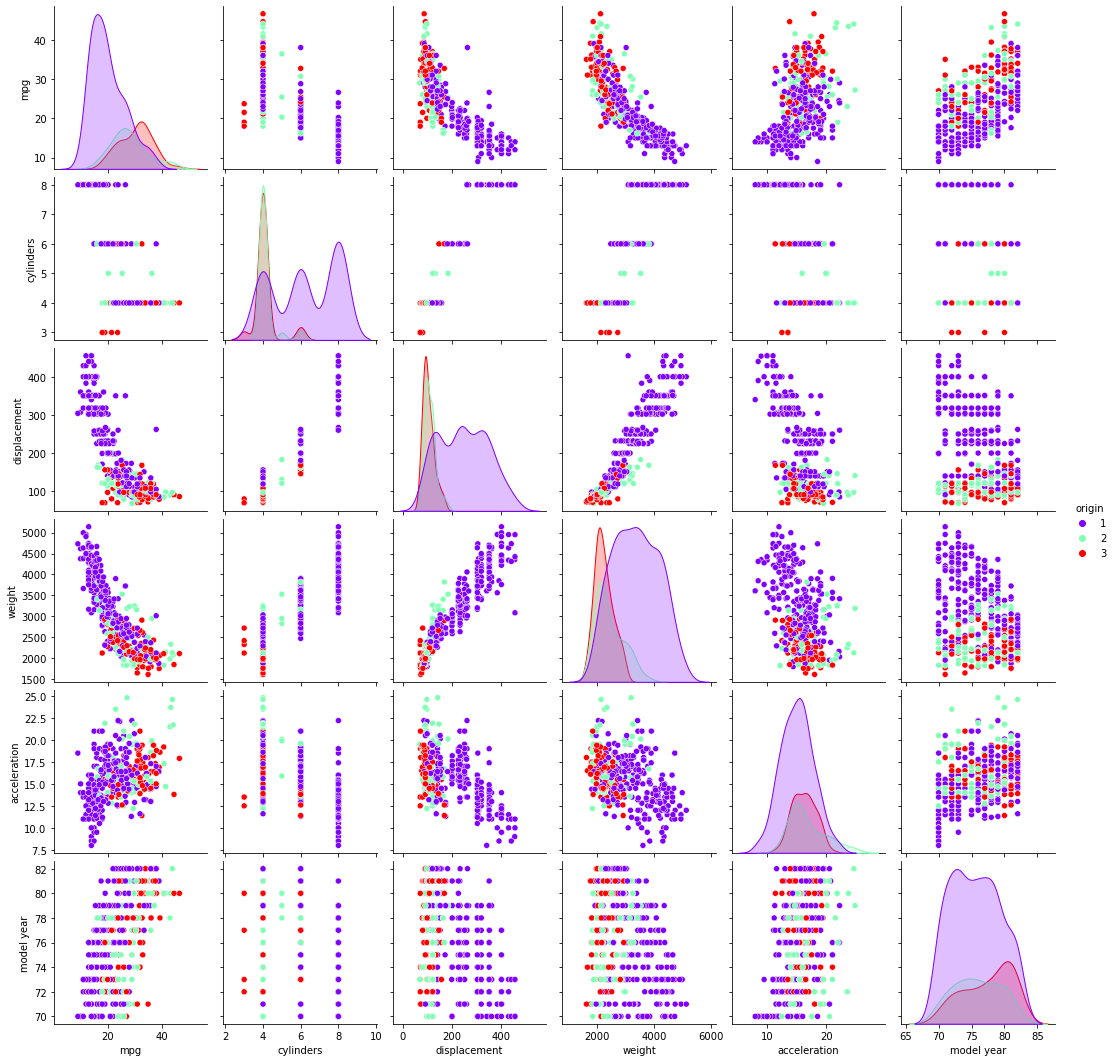

In [10]:
import seaborn as sns
sns.pairplot(df_auto, hue='origin',palette='rainbow')

Text(0.5, 1.0, 'Heatmap of the Dataset')

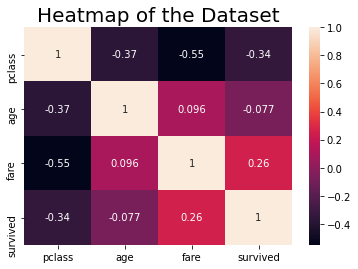

In [3]:
t_df = sns.load_dataset('titanic')
t_df[['pclass','age','fare','survived']].corr()
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [4]:
table = t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],
                        aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

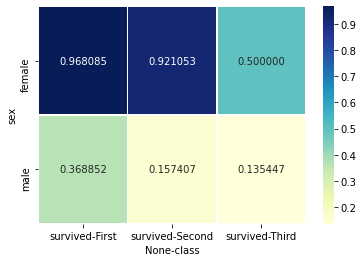

In [6]:
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='YlGnBu',
           linewidth=.5,
           cbar=True)

In [12]:
import numpy as np
fish_data = np.array([ 5, 7, 9,1,5, 6, 6, 2,  4,  4,  5,  6,  7,  3,  8, 10])

<AxesSubplot:ylabel='Count'>

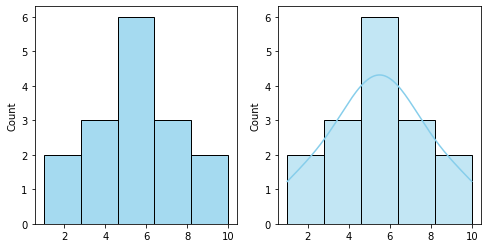

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(fish_data,color='skyblue',kde=False,ax=ax1)
sns.histplot(fish_data,color='skyblue',kde=True,ax=ax2)